# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [5]:
#Daniel Lonkry 3736

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT  
Goal: עזרה בכתיבת markdown למחברת  

Propmpt1: תכתבי לי markdown שמסכם את הרגרסיה הליניארית  
Propmpt2: תוסיפי הסבר ל-EDA  
Propmpt3: תעזרי לי לנסח סיכום באנגלית למחברת  

AI agent name 2: ChatGPT  
Goal: לבדוק איזה פיצ'רים הכי חשובים במודל  

Propmpt1: תראי לי איך עושים feature importance לעץ החלטה  
Propmpt2: תעזרי לי לבנות את הטבלה של החשיבויות  

AI agent name 3: ChatGPT  
Goal: לתקן טעויות סינטקס  
Propmpt1: *הדבקה של קטע* 

AI agent name 4: ChatGPT  
Goal: להבין מבנה וסיפריות נכונות לייבוא למודלים  
Propmpt1: תלמדי אותי את השלד של שימוש בgridsearchCV ואיזה ספריות אני צריך לייבא בשביל המודלים 
 

Other assistanse: ניסוח של README וטבלאות השוואה בין מודלים  
</pre>


## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

<pre>

I have decided to ask three qustions for this project from the dataset "Housing", for start the dataset is about Tecnical details about houses in a certian area
it have the following colllums:

MedInc 
HouseAge 
AveRooms 
AveBedrms 
Population  
AveOccup 
Latitude 
Longitude 
MedHouseVal 

From this info we will ask the following qustions as start:

1.is there a connection between income and number of Rooms;
2.is there a connection between Houseage and his price;
3.is there a standard ratio for bedrooms and rooms in houses;

And then will try to predict about info we dont have from a model that will train on the current info and see if we are right.
    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [6]:
# IF NEEDED!!!!!

%pip install seaborn
%pip install matplotlib
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
# First Step - Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Second Step - Load the data
df_train = pd.read_csv('housing_train.csv')
df_test = pd.read_csv('housing_test.csv')

# Third Step - Explore the data  - see statistics and first rows
print(df_train.head())
print(df_test.head())
print(df_train.describe())
print(df_test.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.009836       848.0  2.780328    

## EDA 1

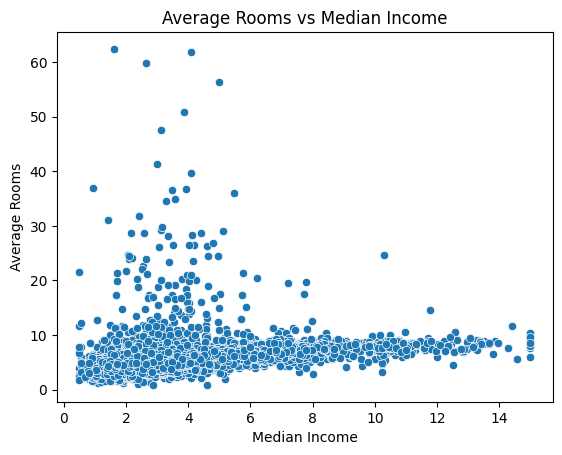

In [ ]:
sns.scatterplot(x='MedInc',y='AveRooms',data=df_train)
plt.title('Average Rooms vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Average Rooms') 
plt.show()




### Visualization – Average Rooms vs Median Income

This scatter plot shows the relationship between median income (`MedInc`) and the average number of rooms per household (`AveRooms`).

**What we observe:**
- There is a weak positive trend: higher income areas tend to have slightly more rooms.
- However, the data is quite scattered, especially at low income levels.
- A large number of households, regardless of income, have between 4 to 7 rooms.

**Conclusion:**
While `MedInc` may have some influence on `AveRooms`, it's not a strong linear relationship.  
This could suggest that income impacts house value more directly than it affects room count.



## EDA 2

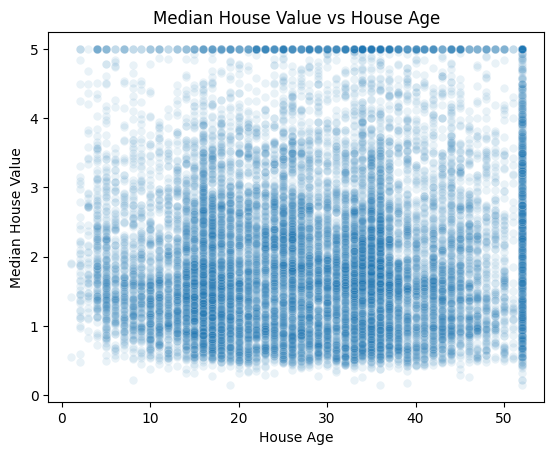

In [12]:
sns.scatterplot(x='HouseAge',y='MedHouseVal',data=df_train,alpha=0.095)
plt.title('Median House Value vs House Age')
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.show()


### Visualization – Median House Value vs House Age

This scatter plot shows the relationship between house age (`HouseAge`) and the median house value (`MedHouseVal`).

**What we observe:**
- There is no strong trend or correlation between the age of the house and its value.
- House prices are widely spread across all age groups.

**Conclusion:**  
While `HouseAge` might contribute some information, it does not appear to be a strong linear predictor of `MedHouseVal`.  
This feature may require transformation (e.g., binning by decades) or be more useful when combined with other variables in non-linear models.


## EDA 3

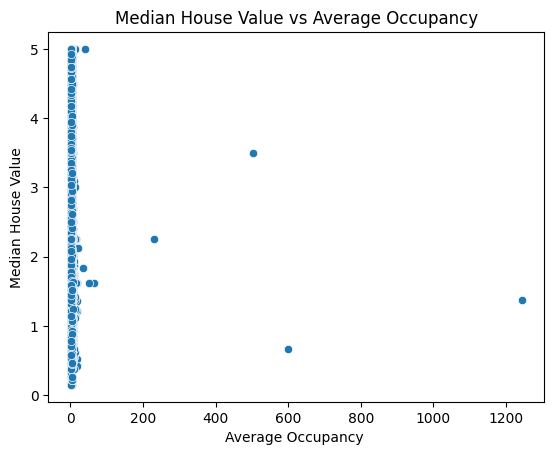

In [13]:
sns.scatterplot(x='AveOccup',y='MedHouseVal',data=df_train)
plt.title('Median House Value vs Average Occupancy')
plt.xlabel('Average Occupancy ')
plt.ylabel('Median House Value') 
plt.show()


### Visualization – Median House Value vs Average Occupancy (Filtered)

**Goal:**  
To examine the relationship between average household occupancy (`AveOccup`) and house value (`MedHouseVal`).

**Reason for Filtering:**  
The original dataset contained extreme outliers in `AveOccup` (values above 1000), which skewed the plot and made it unreadable.  
Most data points fall within the 0–10 range, so we filtered the data accordingly to better visualize the relevant trends.

**Flow Relevance:**  
This step helps detect whether `AveOccup` might be a useful feature in the prediction model, and whether it requires transformation or capping as part of the Feature Engineering stage.


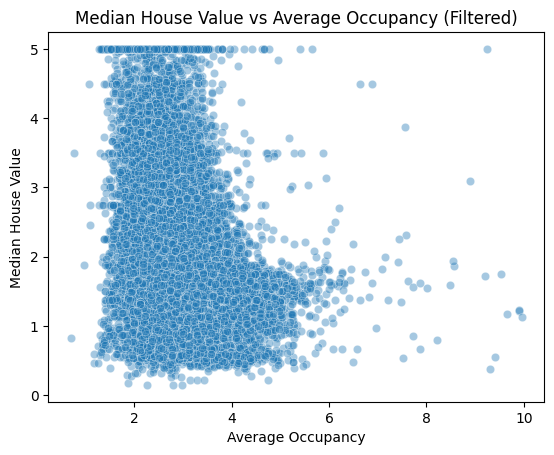

In [15]:
filtered_df = df_train[df_train["AveOccup"] <= 10]

sns.scatterplot(data=filtered_df, x="AveOccup", y="MedHouseVal", alpha=0.4)
plt.title("Median House Value vs Average Occupancy (Filtered)")
plt.xlabel("Average Occupancy")
plt.ylabel("Median House Value")
plt.show()


**What we see:**  
After filtering extreme outliers, we observe that most homes with lower average occupancy (between 2–4 residents) tend to cluster around higher median house values.  
As occupancy increases beyond that, the house values become more scattered and tend to decrease, suggesting a possible negative correlation between overcrowding and property value.


## Part 3 - Experiments
You could add as many code cells as needed

## MODEL 1 - GridSearchCV on Linear Reg



In [ ]:
%pip install sklearn

In [16]:
# Step 1 - Import the libraries

from sklearn.linear_model import LinearRegression as LR  # Reg Model
from sklearn.model_selection import GridSearchCV, cross_val_score  # Our Tool for smart hyperparameter tuning
from sklearn.pipeline import Pipeline  # chain together preprocessing and model tuning
from sklearn.preprocessing import StandardScaler as SC  # Standardize the data

In [24]:
pipeline_LR = Pipeline([ ('SC', SC()), ('LR', LR())])
param_grid_LR = { 'LR__fit_intercept': [True, False],'LR__positive': [True, False] } #Fit_Intercpt - is to learn b in xm+b and positive is to learn only positive values of b

grid_LR = GridSearchCV(
    estimator=pipeline_LR,
    param_grid=param_grid_LR,
    cv=5,
    scoring='r2',
    n_jobs=-1   
)

X = df_train.drop(columns=['MedHouseVal'])
y = df_train['MedHouseVal']

grid_LR.fit(X, y)

results_df = pd.DataFrame(grid_LR.cv_results_)
results_summary_LR = results_df[["params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)
results_summary_LR



,params,mean_test_score
1,"{'LR__fit_intercept': True, 'LR__positive': Fa...",0.604824
0,"{'LR__fit_intercept': True, 'LR__positive': True}",0.507722
3,"{'LR__fit_intercept': False, 'LR__positive': F...",-2.613793
2,"{'LR__fit_intercept': False, 'LR__positive': T...",-2.710856


### GridSearchCV Results – Linear Regression

**What this table shows:**  
Each row represents a different combination of hyperparameters tested using 5-fold cross-validation.  
For each configuration, the average `r²` score across the folds is shown under `mean_test_score`.

**How to interpret it:**  
- The higher the `r²` score, the better the model fits the data.  
- The best configuration is the one with the **highest `mean_test_score`**, which means it had the best predictive performance on average.

**What we’ll do next:**  
We will select the configuration with the highest `r²` score and retrain the model using the entire training set with those hyperparameters.


## MODEL 2 - GridSearchCV on DecisionTree

In [27]:
from sklearn.tree import DecisionTreeRegressor as DTR
pipeline_DTR = Pipeline([('DTR', DTR())])

param_grid_DTR = {   'DTR__max_depth': [None, 10, 5, 3],
    'DTR__min_samples_split': [10, 5, 2],
    'DTR__min_samples_leaf': [4, 2, 1],
    'DTR__max_features': [None, 'sqrt']}

grid_DTR = GridSearchCV(
       estimator=pipeline_DTR,
       param_grid=param_grid_DTR,
       cv=5,
       scoring='r2',
       n_jobs=-1
)

grid_DTR.fit(X, y)
results_df_DTR = pd.DataFrame(grid_DTR.cv_results_).sort_values(by="mean_test_score", ascending=False)
results_summary_DTR = results_df_DTR[["params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)
results_df_DTR


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DTR__max_depth,param_DTR__max_features,param_DTR__min_samples_leaf,param_DTR__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.149017,0.009786,0.003151,0.000746,10,None,4,10,"{'DTR__max_depth': 10, 'DTR__max_features': No...",0.727592,0.685131,0.671767,0.663366,0.683817,0.686335,0.022135,1
20,0.152595,0.016598,0.004162,0.001366,10,None,4,2,"{'DTR__max_depth': 10, 'DTR__max_features': No...",0.725347,0.685262,0.669751,0.662334,0.685460,0.685631,0.021783,2
19,0.144541,0.014597,0.004290,0.002529,10,None,4,5,"{'DTR__max_depth': 10, 'DTR__max_features': No...",0.724539,0.681625,0.670249,0.662722,0.685283,0.684883,0.021395,3
21,0.145518,0.011165,0.002583,0.000235,10,None,2,10,"{'DTR__max_depth': 10, 'DTR__max_features': No...",0.720395,0.681917,0.672414,0.647783,0.676174,0.679737,0.023432,4
24,0.126765,0.005457,0.003124,0.000594,10,None,1,10,"{'DTR__max_depth': 10, 'DTR__max_features': No...",0.710372,0.681558,0.667381,0.644100,0.673100,0.675302,0.021495,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.012421,0.001007,0.002318,0.000191,3,sqrt,1,10,"{'DTR__max_depth': 3, 'DTR__max_features': 'sq...",0.282814,0.496339,0.387955,0.263615,0.149802,0.316105,0.117615,68
71,0.010811,0.000902,0.001663,0.000160,3,sqrt,1,2,"{'DTR__max_depth': 3, 'DTR__max_features': 'sq...",0.447194,0.238960,0.275594,0.245222,0.306262,0.302647,0.076148,69
64,0.013165,0.001387,0.002424,0.000277,3,sqrt,4,5,"{'DTR__max_depth': 3, 'DTR__max_features': 'sq...",0.211800,0.439861,0.124933,0.360330,0.318266,0.291038,0.110960,70
68,0.013783,0.000841,0.002516,0.000186,3,sqrt,2,2,"{'DTR__max_depth': 3, 'DTR__max_features': 'sq...",0.352287,0.286590,0.118623,0.428468,0.260728,0.289339,0.103237,71


## MODEL 3 - GridSearchCV on MLP

In [74]:
from sklearn.neural_network import MLPRegressor 

Pipeline_MLP = Pipeline([('scaler', SC()), ('MLP', MLPRegressor())])

param_grid_mlp = {
    'MLP__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'MLP__activation': ['relu', 'tanh'],
    'MLP__alpha': [0.0001, 0.001], 
    'MLP__learning_rate': ['constant', 'adaptive'],
    'MLP__max_iter': [1000, 1500]
}

from sklearn.model_selection import GridSearchCV

grid_MLP = GridSearchCV(
    estimator=Pipeline_MLP,
    param_grid=param_grid_mlp,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_MLP.fit(X, y)
results_df_MLP = pd.DataFrame(grid_MLP.cv_results_).sort_values(by="mean_test_score", ascending=False)
results_summary_MLP = results_df_MLP[["params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)
results_df_MLP

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_MLP__activation,param_MLP__alpha,param_MLP__hidden_layer_sizes,param_MLP__learning_rate,param_MLP__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,25.627717,3.827219,0.012656,0.003947,tanh,0.0010,"(100, 50)",constant,1500,"{'MLP__activation': 'tanh', 'MLP__alpha': 0.00...",0.813255,0.788812,0.782316,0.802877,0.787337,0.794919,0.011429,1
34,28.042573,3.814199,0.016757,0.000727,tanh,0.0001,"(100, 50)",adaptive,1000,"{'MLP__activation': 'tanh', 'MLP__alpha': 0.00...",0.810465,0.795351,0.787028,0.791494,0.785685,0.794005,0.008910,2
47,21.879067,1.669593,0.008063,0.001981,tanh,0.0010,"(100, 50)",adaptive,1500,"{'MLP__activation': 'tanh', 'MLP__alpha': 0.00...",0.807833,0.786824,0.775701,0.798902,0.792971,0.792446,0.010869,3
23,14.767371,3.245388,0.007572,0.000306,relu,0.0010,"(100, 50)",adaptive,1500,"{'MLP__activation': 'relu', 'MLP__alpha': 0.00...",0.809745,0.784296,0.780752,0.797513,0.789881,0.792437,0.010341,4
35,27.999451,6.451527,0.016739,0.000941,tanh,0.0001,"(100, 50)",adaptive,1500,"{'MLP__activation': 'tanh', 'MLP__alpha': 0.00...",0.807960,0.793161,0.774952,0.790436,0.790712,0.791444,0.010481,5
22,13.292686,3.880176,0.008153,0.001143,relu,0.0010,"(100, 50)",adaptive,1000,"{'MLP__activation': 'relu', 'MLP__alpha': 0.00...",0.804877,0.785337,0.786439,0.794363,0.785062,0.791216,0.007639,6
33,34.052631,6.938647,0.017469,0.002840,tanh,0.0001,"(100, 50)",constant,1500,"{'MLP__activation': 'tanh', 'MLP__alpha': 0.00...",0.804654,0.792165,0.780480,0.794728,0.782229,0.790851,0.008822,7
44,22.549376,1.844273,0.017977,0.004195,tanh,0.0010,"(100, 50)",constant,1000,"{'MLP__activation': 'tanh', 'MLP__alpha': 0.00...",0.809761,0.792446,0.776026,0.793391,0.782368,0.790798,0.011474,8
32,29.649286,6.553683,0.017725,0.001032,tanh,0.0001,"(100, 50)",constant,1000,"{'MLP__activation': 'tanh', 'MLP__alpha': 0.00...",0.805098,0.786510,0.773100,0.801629,0.787002,0.790668,0.011556,9
10,15.165992,2.868989,0.008864,0.000707,relu,0.0001,"(100, 50)",adaptive,1000,"{'MLP__activation': 'relu', 'MLP__alpha': 0.00...",0.802093,0.790784,0.781946,0.790465,0.786669,0.790391,0.006667,10


### Best Hyperparameters Summary

After running `GridSearchCV` with 5-fold cross-validation, we identified the best combination of hyperparameters for each model.

---

**🔹 Linear Regression:**
- `fit_intercept = True`
- `positive = False`
- **Best mean r² score:** ~0.60

---

**🔹 Decision Tree Regressor:**
- `max_depth = 10`
- `min_samples_split = 10`
- `min_samples_leaf = 4`
- `max_features = None`
- **Best mean r² score:** ~0.68

---

**🔹 MLP Regressor (Neural Network):**
- `hidden_layer_sizes = (100, 50)`
- `activation = tanh`
- `alpha = 0.001`
- `learning_rate = constant`
- `max_iter = 1500`
- **Best mean r² score:** ~0.79

---

These results show that the **MLP Regressor outperformed** both the Decision Tree and the Linear Regression models.  
This is likely due to its ability to capture complex non-linear relationships in the data using multiple layers and activation functions.


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [28]:
best_lr = grid_LR.best_estimator_
best_lr.fit(X, y)

best_dtr = grid_DTR.best_estimator_
best_dtr.fit(X, y)

Pipeline(steps=[('DTR',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=10))])

In [ ]:
best_MLP = grid_MLP.best_estimator_
best_MLP.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('MLP',
                 MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 50),
                              learning_rate='adaptive', max_iter=1500))])

In [68]:
grid_MLP.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('MLP', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'MLP__activation': ['relu', 'tanh'],
                         'MLP__alpha': [0.0001, 0.001],
                         'MLP__hidden_layer_sizes': [(50,), (100,), (100, 50)],
                         'MLP__learning_rate': ['constant', 'adaptive'],
                         'MLP__max_iter': [1000, 1500]},
             scoring='r2')

## Part 5 - Apply on test and show model performance estimation

In [77]:
X_Test = df_test.drop(columns=['MedHouseVal'])
Y_test = df_test["MedHouseVal"]

In [78]:
y_pred_DTR = best_dtr.predict(X_Test)
y_pred_LR = best_lr.predict(X_Test)
Y_pred_MLP = best_MLP.predict(X_Test)


In [79]:

print("First 5 predicted house prices by DTR:", y_pred_DTR[:5])
print("First 5 predicted house prices by LR:", y_pred_LR[:5])
print("First 5 predicted house prices by MLP:", Y_pred_MLP[:5])
print("First 5 house values from Test CSV:", Y_test.values[:5])

First 5 predicted house prices by DTR: [3.45407762 2.22014943 3.35266667 1.45957143 1.197     ]
First 5 predicted house prices by LR: [3.09515207 2.95032283 2.86341271 1.43713286 0.32911017]
First 5 predicted house prices by MLP: [3.90639227 2.11271741 2.33032099 1.21766951 1.17009796]
First 5 house values from Test CSV: [3.852 2.457 2.013 1.052 1.078]


In this step, we applied the trained models to the test data (`housing_test.csv`) to evaluate their performance.

We used the `predict()` method on both models:
- `best_DTR`: Decision Tree Regressor
- `best_LR`: Linear Regression

We then printed the first 5 predicted house values from each model and compared them to the actual values from the test set.


> **Note:**  
> This section was created with the help of ChatGPT 4.0 to assist in understanding how the Decision Tree Regressor prioritizes features.  
> While classification trees use information gain based on entropy, regression trees like the one used here split nodes based on reduction in variance (MSE).  
> The feature importance chart helps visualize which variables contributed most to the tree's prediction logic.


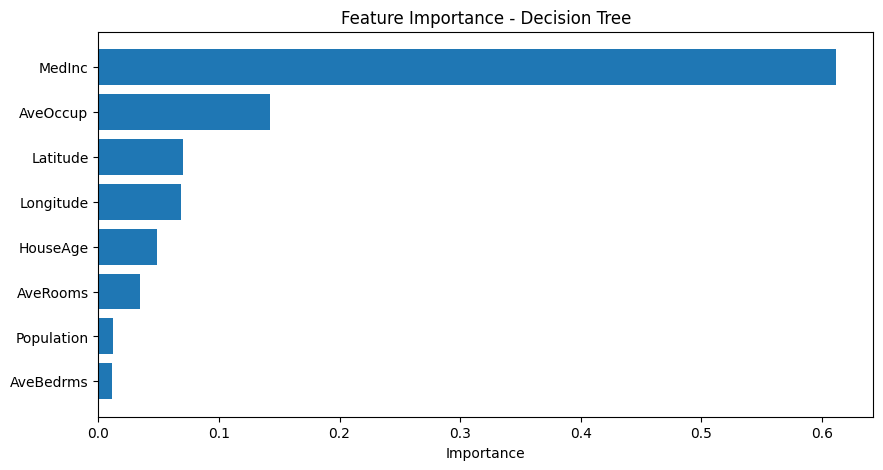

In [41]:

feature_names = X.columns
importances = best_dtr.named_steps['DTR'].feature_importances_
import pandas as pd

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.show()


### Feature Importance – Decision Tree Regressor

This bar chart shows how much each input feature contributed to the final prediction of house values, based on the trained Decision Tree model.

**Key insights:**
- `MedInc` (median income) is by far the most influential feature, with a score above 0.6. This suggests that household income in a region is the strongest predictor of house prices.
- `AveOccup` (average occupancy) and `Latitude/Longitude` also play a moderate role in the model's decisions.
- Features like `Population`, `AveRooms`, and `AveBedrms` have very low importance scores and might be considered for removal in future feature selection stages.

This analysis helps explain how the model "thinks" and guides us in improving future models or simplifying the input.


In [80]:
from sklearn.metrics import r2_score
r2_dtr = r2_score(Y_test, y_pred_DTR)
r2_lr = r2_score(Y_test, y_pred_LR)
r2_mlp = r2_score(Y_test, Y_pred_MLP)

print(f"R^2 Score for Decision Tree Regressor: {r2_dtr:.4f}")
print(f"R^2 Score for Linear Regression: {r2_lr:.4f}")  
print(f"R^2 Score for MLP Regressor: {r2_mlp:.4f}")

R^2 Score for Decision Tree Regressor: 0.7229
R^2 Score for Linear Regression: 0.6041
R^2 Score for MLP Regressor: 0.8149


## The MLP Regressor outperformed all other models with an r² score of 0.8149 on the test set.


---
## Final Summary

In this project, we developed and evaluated three supervised learning models to predict house prices using a structured dataset:  
- Linear Regression  
- Decision Tree Regressor  
- MLP Regressor (Neural Network)

Each model was tuned using GridSearchCV with 5-fold cross-validation to identify the best-performing hyperparameters.  
The models were retrained on the full training data and evaluated on the test set using the R² score.

**Key conclusions:**
- Most models hyperparametrs became easier to compare and select when using methods like GridSearchCV.
- Linear Regression provided a good baseline (R² ~ 0.60), while Decision Tree performed better (R² ~ 0.72) due to its non-linear decision boundaries.
- The MLP Regressor achieved the highest score (R² ~ 0.81), even though adding a few hundred more epochs (max_iter) had **little to no effect** on the final result.


